# Data Exploration & Data Cleaning

[Data source](https://www.kaggle.com/shivam2503/diamonds)

## Goal
Training a Machine Learning algorithm that predicts the price of diamonds

## Data
The dataset contains data on 54 000 diamonds. For each diamond, we have:
* price price in US dollars (\$326--\$18,823)
* carat weight of the diamond (0.2--5.01)
* cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)
* color diamond colour, from J (worst) to D (best)
* clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
* x length in mm (0--10.74)
* y width in mm (0--58.9)
* z depth in mm (0--31.8)
* depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
* table width of top of diamond relative to widest point (43--95)

## Notes
In this project, I want to focus on modeling.
I will therefore not go to deep on data exploration & data cleaning.
I am conscious of the fact this step is crucial to get the best model, but here my goal is just to practice modeling.

In [31]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
%matplotlib inline
mpl.rcParams['figure.dpi']= 300    # tells matplotlib to display inline plots at 300 DPI
mpl.rc("savefig", dpi = 300)       # tells matplotlib to save plots at 300 DPI
style.use("fivethirtyeight")
# Ignore warnings :
import warnings
warnings.filterwarnings('ignore')

## General Exploration

In [2]:
data = pd.read_csv("diamonds.csv").drop(["Unnamed: 0"], axis=1)    # dropping a useless column
data.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
carat      53940 non-null float64
cut        53940 non-null object
color      53940 non-null object
clarity    53940 non-null object
depth      53940 non-null float64
table      53940 non-null float64
price      53940 non-null int64
x          53940 non-null float64
y          53940 non-null float64
z          53940 non-null float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


* There are no missing values
* Columns seem to be of the appropriate type

## Cleaning Columns

In [4]:
# Numerical Cols
data.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


x, y and z are translate the volume of the diamond. They cannot have a value of zero

In [5]:
impossible_volume = data[(data["x"] == 0) | (data["y"] == 0) | (data["z"] == 0)]
impossible_volume.shape[0]

20

Only 20 diamonds have impossible volumes (0.04%) so we can safely drop them.

In [6]:
data = data.drop(impossible_volume.index)

In [7]:
data.corr()["price"]

carat    0.921592
depth   -0.010729
table    0.127245
price    1.000000
x        0.887231
y        0.867864
z        0.868206
Name: price, dtype: float64

In [8]:
# Categorical Cols

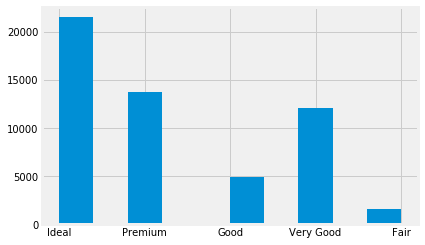

In [9]:
data["cut"].hist()

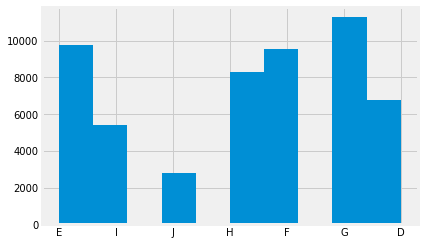

In [10]:
data["color"].hist()

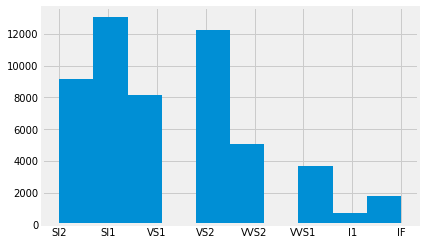

In [11]:
data["clarity"].hist()

We don't see anything clearly abnormal in the categories. Each category has at least a few representations, and no category is too dominant.

## Converting categorical to numeric

In [12]:
data = pd.get_dummies(data)
data.head()

,carat,depth,table,price,x,y,z,cut_Fair,cut_Good,cut_Ideal,...,color_I,color_J,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,0,1,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,0,...,1,0,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,0,1,0,...,0,1,0,0,0,1,0,0,0,0


## Feature Engineering
We should not add the features x, y, and z separately to our model as they make more sense when taken together as the volume of the diamond.

In [13]:
data["volume"] = data["x"] * data["y"] * data["z"]
data = data.drop(["x", "y", "z"], axis=1)

## Data Scaling
The values range in a very different way from column to column.
We should rescale them to fit them better to our model.

In [14]:
numeric_data = data.select_dtypes(include=["int64", "float64"])
numeric_cols = numeric_data.drop(["price"], axis=1).columns # we don't want to scale our target: price
numeric_cols

Index(['carat', 'depth', 'table', 'volume'], dtype='object')

In [15]:
from sklearn.preprocessing import minmax_scale

for col in numeric_cols:
    data[col] = minmax_scale(data[col])
    
data[numeric_cols].head()

,carat,depth,table,volume
0,0.006237,0.513889,0.230769,0.001705
1,0.002079,0.466667,0.346154,0.000735
2,0.006237,0.386111,0.423077,0.001672
3,0.018711,0.538889,0.288462,0.003943
4,0.022869,0.563889,0.288462,0.005306


## Feature Selection

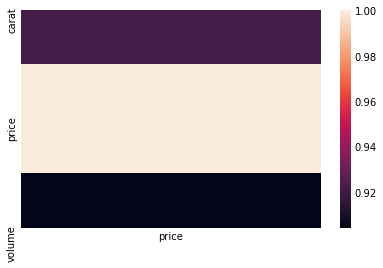

In [16]:
corr_matrix = data.corr()
correlated_with_price = corr_matrix[np.abs(corr_matrix["price"]) > .3]
sns.heatmap(correlated_with_price[["price"]])

## Reducing Collinearity
To reduce collinearity between our features, we should drop one category per category group.
We don't lose information by doing this as the value of a category can be retrieved by using the value for all other categories in the group.

For each category group, we will drop the category that contains the least variance, as low variance features tend to be ineffective.

In [17]:
# Return the name of the column of least variance
def find_col_of_least_variance(df):
    deviations = [df[col].std() for col in df.columns]
    min_deviation = np.min(deviations)
    return df.columns[deviations.index(min_deviation)]

# Returns a new DataFrame with the member of least variance of the category dropped
def drop_least_variance_member(df, category):
    members = [col for col in df.columns if col.startswith(category)]
    col_to_drop = find_col_of_least_variance(df[members])
    print("Dropping " + col_to_drop)
    return df.drop([col_to_drop], axis=1)

# Returns a new DataFrame with the member of least variance of each category dropped
def drop_least_variance_members(df, categories):
    for category in categories:
        df = drop_least_variance_member(df, category)
    return df

data_cleaned = drop_least_variance_members(data, ["cut", "color", "clarity"])

Dropping cut_Fair
Dropping color_J
Dropping clarity_I1


## Train/Test split

In [18]:
from sklearn.model_selection import train_test_split

target = "price"
X = data_cleaned.drop([target], axis=1)
y = data_cleaned[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=1)

## Feature Selection

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFECV

def select_features(X_train, y_train, target): 
    lr = LinearRegression()
    selector = RFECV(lr, cv=10)
    selector.fit(X_train, y_train)
    
    best_columns = list(X_train.columns[selector.support_])    
    return best_columns


features = select_features(X_train, y_train, "price")
features

['carat',
 'depth',
 'table',
 'cut_Good',
 'cut_Ideal',
 'cut_Premium',
 'cut_Very Good',
 'color_D',
 'color_E',
 'color_F',
 'color_G',
 'color_H',
 'color_I',
 'clarity_IF',
 'clarity_SI1',
 'clarity_SI2',
 'clarity_VS1',
 'clarity_VS2',
 'clarity_VVS1',
 'clarity_VVS2',
 'volume']

## Validating with Cross-Validation
Cross-validating with 10 folds means that the model will be trained 10 times using 90% of the training data. The trained model then makes predictions on the 10% left and we compute the predictions' R².

At each training iteration, the data that is used as test data changes. The score that we get at the end is the mean of the 10 scores. By doing this, we reduce overfitting by testing our model on different permutations of the data.

In [20]:
from sklearn.model_selection import cross_val_score

lr = LinearRegression()
scores = cross_val_score(lr, X_train[features], y_train, cv=10)
accuracy = scores.mean()
print(accuracy) # accuracy is measured as R²: coefficient of determination [0:1]

0.8965064444787526


## Predicting
Now that we validated our model, we can use it to make predictions on our test data.

In [21]:
lr.fit(X_train[features], y_train)
predictions = lr.predict(X_test[features])

## Error
How far are our predictions from reality?

We will measure our error with:
* R²: Coefficent of determination. It's the proportion of the variance in the dependent variable that is predictable from the independent variables. It ranges from 0 to 1, 1 being the best.
* MSE: Mean squared error. It measures the average of the squares of the errors. The closer it is to 0 the better.
* RMSE: Root mean squared error. It measures the standard deviation of the errors. The it is to 0 the better, and it's expressed in the target's unit, which here means it's expressed in $.


In [22]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

r_squarred = r2_score(predictions, y_test)
mse = mean_squared_error(predictions, y_test)
rmse = np.sqrt(mse)
print("R² score: " + str(r_squarred))
print("MSE:      " + str(mse))
print("RMSE:     " + str(rmse))

R² score: 0.9082249818261265
MSE:      1263702.4020779473
RMSE:     1124.145187276958


## Model Selection + Hyperparameter Optimization
In this section, we will do two steps simultaneously:
* Model selection: try different types of models to select the best one
* Hyperparameter optimization: try different parameters for each model to select the best one
At the end of this step we will have selected the best type of model with the best parameters.
n_jobs: -1 -> use all cores

In [34]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

def get_best_model(X_train, y_train):
    models = [
        {
            "name": "LinearRegression",
            "estimator": LinearRegression(),
            "hyperparameters":
                {
                    "n_jobs": [-1]
                }
        },
        {
            "name": "KNeighborsRegressor",
            "estimator": KNeighborsRegressor(),
            "hyperparameters":
                {
                    "n_neighbors": range(1, 20),
                    "weights": ["distance", "uniform"],
                    "algorithm": ["ball_tree", "kd_tree", "brute"],
                    "p": [1,2],
                    "n_jobs": [-1]
                }
        },
        {
            "name": "DecisionTreeRegressor",
            "estimator": DecisionTreeRegressor(),
            "hyperparameters":
            {
                    "max_depth": [2, 5, 10, 20, 40, 80],
                    "max_features": ["log2", "sqrt"],
                    "min_samples_leaf": range(1, 6),
                    "min_samples_split": [2, 3, 4, 5, 8, 12, 16]
            }
        },
        {
            "name": "RandomForestRegressor",
            "estimator": RandomForestRegressor(random_state=1),
            "hyperparameters":
                {
                    "n_estimators": [100],
                    "max_depth": [2, 5, 10, 20, 40, 80],
                    "max_features": ["log2", "sqrt"],
                    "min_samples_leaf": range(1, 6),
                    "min_samples_split": [2, 3, 4, 5, 8, 12, 16],
                    "n_jobs": [-1]
                }
        }
    ]
    
    for model in models:
        print(model['name'])
        print('-'*len(model['name']))

        grid = GridSearchCV(model["estimator"],
                            param_grid=model["hyperparameters"],
                            cv=10)
        grid.fit(X_train, y_train)
        model["best_params"] = grid.best_params_
        model["best_score"] = grid.best_score_
        model["best_model"] = grid.best_estimator_

        print("Best Score: {}".format(model["best_score"]))
        print("Best Parameters: {}\n".format(model["best_params"]))

    return models

models = get_best_model(X_train, y_train)

LinearRegression
----------------
Best Score: 0.8965089947872372
Best Parameters: {'n_jobs': -1}

KNeighborsRegressor
-------------------
Best Score: 0.9648781094895003
Best Parameters: {'algorithm': 'brute', 'n_jobs': -1, 'n_neighbors': 3, 'p': 1, 'weights': 'distance'}

DecisionTreeRegressor
---------------------
Best Score: 0.9434452396192371
Best Parameters: {'max_depth': 80, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 16}

RandomForestRegressor
---------------------
Best Score: 0.9697990720518088
Best Parameters: {'max_depth': 80, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'n_jobs': -1}



In [61]:
errors = np.abs(predictions - y_test) / y_test * 100
test_with_error = X_test.copy()
test_with_error["error"] = errors
test_with_error.corr()["error"]

carat           -0.046386
depth            0.020397
table            0.021200
x               -0.054303
y               -0.049961
z                0.261901
cut_Good         0.025338
cut_Ideal       -0.041148
cut_Premium     -0.011943
cut_Very Good    0.005565
color_D         -0.026775
color_E          0.001278
color_F          0.000304
color_G         -0.023077
color_H         -0.017540
color_I          0.015182
clarity_IF       0.043598
clarity_SI1     -0.062941
clarity_SI2      0.092296
clarity_VS1     -0.056522
clarity_VS2     -0.092482
clarity_VVS1     0.036514
clarity_VVS2     0.013690
error            1.000000
Name: error, dtype: float64

In [23]:
impossible_volume = data[(data["x"] == 0) | (data["y"] == 0) | (data["z"] == 0)]
impossible_volume.shape[0]

3

In [30]:
models

[{'name': 'LinearRegression',
  'estimator': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
  'hyperparameters': {'n_jobs': [-1]},
  'best_params': {'n_jobs': -1},
  'best_score': 0.8965089947872372,
  'best_model': LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)},
 {'name': 'KNeighborsRegressor',
  'estimator': KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                      weights='uniform'),
  'hyperparameters': {'n_neighbors': [1],
   'weights': ['distance', 'uniform'],
   'algorithm': ['ball_tree', 'kd_tree', 'brute'],
   'p': [1, 2],
   'n_jobs': [-1]},
  'best_params': {'algorithm': 'brute',
   'n_jobs': -1,
   'n_neighbors': 1,
   'p': 1,
   'weights': 'distance'},
  'best_score': 0.9555324062219607,
  'best_model': KNeighborsRegressor(algorithm='brute', leaf_size=30, metric='minkowski',
                      me